# Figure 4: Napkin Formula

**Goal**: Create a visual summary of the practical bidding formula for practitioners.

The "napkin formula" is a simple rule-of-thumb derived from the regression analysis.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Rectangle
import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

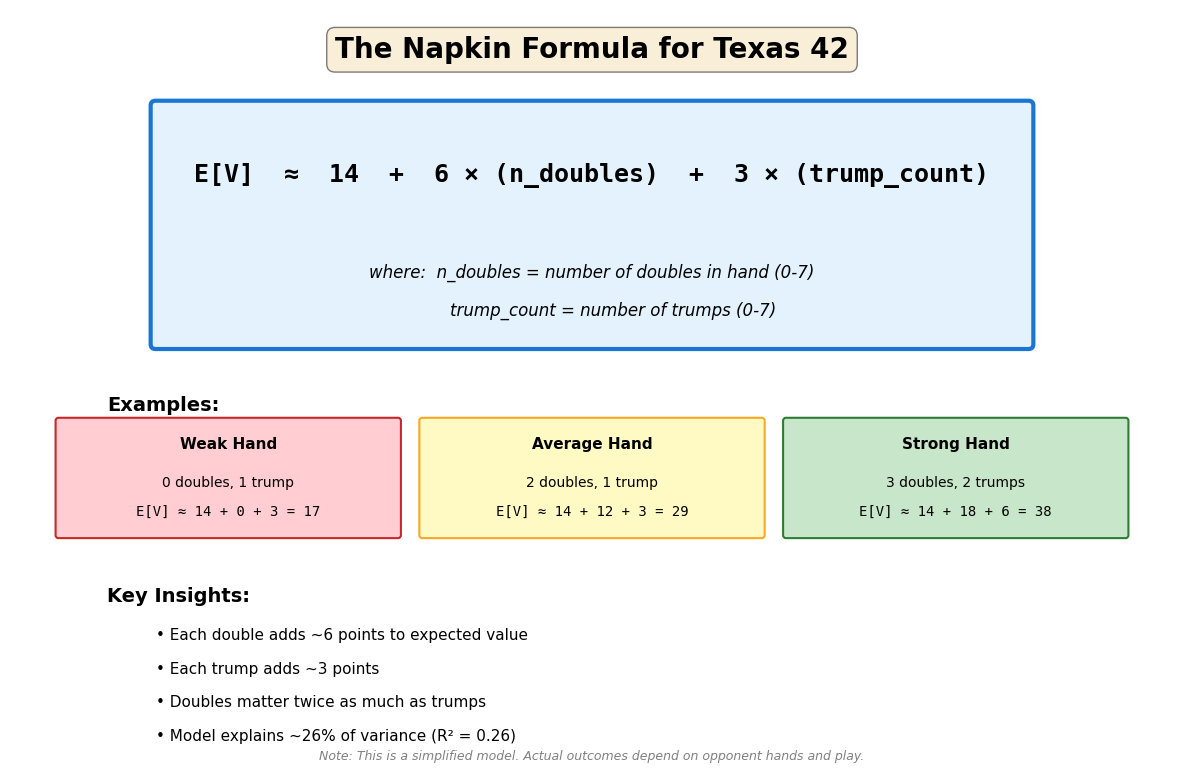

In [2]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 12)
ax.set_ylim(0, 8)
ax.axis('off')

# Title
ax.text(6, 7.5, 'The Napkin Formula for Texas 42', 
        fontsize=20, fontweight='bold', ha='center', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Main formula box
formula_box = FancyBboxPatch((1.5, 4.5), 9, 2.5, 
                              boxstyle="round,pad=0.05", 
                              facecolor='#E3F2FD', edgecolor='#1976D2', 
                              linewidth=3)
ax.add_patch(formula_box)

# Formula text
ax.text(6, 6.2, 'E[V]  ≈  14  +  6 × (n_doubles)  +  3 × (trump_count)', 
        fontsize=18, fontweight='bold', ha='center', 
        family='monospace')

ax.text(6, 5.2, 'where:  n_doubles = number of doubles in hand (0-7)', 
        fontsize=12, ha='center', style='italic')
ax.text(6, 4.8, '        trump_count = number of trumps (0-7)', 
        fontsize=12, ha='center', style='italic')

# Examples section
ax.text(1, 3.8, 'Examples:', fontsize=14, fontweight='bold')

# Example 1: Weak hand
ex1_box = FancyBboxPatch((0.5, 2.5), 3.5, 1.2, 
                          boxstyle="round,pad=0.03", 
                          facecolor='#FFCDD2', edgecolor='#C62828', 
                          linewidth=1.5)
ax.add_patch(ex1_box)
ax.text(2.25, 3.4, 'Weak Hand', fontsize=11, fontweight='bold', ha='center')
ax.text(2.25, 3.0, '0 doubles, 1 trump', fontsize=10, ha='center')
ax.text(2.25, 2.7, 'E[V] ≈ 14 + 0 + 3 = 17', fontsize=10, ha='center', family='monospace')

# Example 2: Medium hand
ex2_box = FancyBboxPatch((4.25, 2.5), 3.5, 1.2, 
                          boxstyle="round,pad=0.03", 
                          facecolor='#FFF9C4', edgecolor='#F9A825', 
                          linewidth=1.5)
ax.add_patch(ex2_box)
ax.text(6, 3.4, 'Average Hand', fontsize=11, fontweight='bold', ha='center')
ax.text(6, 3.0, '2 doubles, 1 trump', fontsize=10, ha='center')
ax.text(6, 2.7, 'E[V] ≈ 14 + 12 + 3 = 29', fontsize=10, ha='center', family='monospace')

# Example 3: Strong hand
ex3_box = FancyBboxPatch((8, 2.5), 3.5, 1.2, 
                          boxstyle="round,pad=0.03", 
                          facecolor='#C8E6C9', edgecolor='#2E7D32', 
                          linewidth=1.5)
ax.add_patch(ex3_box)
ax.text(9.75, 3.4, 'Strong Hand', fontsize=11, fontweight='bold', ha='center')
ax.text(9.75, 3.0, '3 doubles, 2 trumps', fontsize=10, ha='center')
ax.text(9.75, 2.7, 'E[V] ≈ 14 + 18 + 6 = 38', fontsize=10, ha='center', family='monospace')

# Key insights
ax.text(1, 1.8, 'Key Insights:', fontsize=14, fontweight='bold')

insights = [
    '• Each double adds ~6 points to expected value',
    '• Each trump adds ~3 points',
    '• Doubles matter twice as much as trumps',
    '• Model explains ~26% of variance (R² = 0.26)',
]

for i, text in enumerate(insights):
    ax.text(1.5, 1.4 - i*0.35, text, fontsize=11)

# Validity note
ax.text(6, 0.15, 'Note: This is a simplified model. Actual outcomes depend on opponent hands and play.',
        fontsize=9, ha='center', style='italic', color='gray')

plt.tight_layout()
plt.savefig('../../results/figures/fig4_napkin_formula.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.savefig('../../results/figures/fig4_napkin_formula.pdf', bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

## The Formula

From the regression analysis (13a), the napkin formula is:

**E[V] ≈ 14 + 6×(n_doubles) + 3×(trump_count)**

Where:
- Intercept ≈ 14 (baseline expected value)
- n_doubles coefficient ≈ 5.7 (rounded to 6)
- trump_count coefficient ≈ 3.2 (rounded to 3)

### Why This Works

1. **Doubles are trick winners**: Each double is the highest card in its suit
2. **Trumps control**: Having trumps lets you win when you can't follow suit
3. **Additive effects**: SHAP analysis confirmed minimal interaction between features

### Output Files

- `results/figures/fig4_napkin_formula.png` - PNG (300 DPI)
- `results/figures/fig4_napkin_formula.pdf` - Vector format